In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import graphviz
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


pd.set_option('display.max_columns', 500)


In [2]:
data = pd.read_excel('./melbourne-house-prices/melbourne-house-prices.xlsx')

In [3]:
## drop all rows with missing values, this learner was used to find important features
data_copy = data.copy()
# data_copy.dropna(axis='columns', inplace=True)
data_copy.dropna(inplace=True)

In [4]:
data_copy.shape

(8887, 28)

In [5]:
data_copy.head()

,suburb,address,rooms,type_code,type,min_bound_100K,max_bound_100K,price_bands,method_orig,method,realestate_agent,date,year,month,day,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
3,Caulfield,30 Pyne St,4,h,house,100K,200K,100K-200K,PI,PI,Rodney,2017-02-25,2017,2,25,8.9,3162,4.0,1.0,2.0,499.0,155.0,1920.0,Glen Eira City Council,-37.88640,145.02420,Southern Metropolitan,2379
4,Coburg,171 Moreland Rd,4,h,house,100K,200K,100K-200K,PI,PI,Jellis,2016-06-04,2016,6,4,7.8,3058,3.0,1.0,1.0,536.0,164.0,1910.0,Darebin City Council,-37.75550,144.96580,Northern Metropolitan,11204
7,Footscray,10/30 Pickett St,1,u,unit,100K,200K,100K-200K,PI,PI,Burnham,2017-07-01,2017,7,1,5.1,3011,1.0,1.0,0.0,30.0,26.0,2013.0,Maribyrnong City Council,-37.80141,144.89587,Western Metropolitan,7570
9,Albion,10/117 Anderson Rd,1,u,unit,100K,200K,100K-200K,S,S,hockingstuart,2016-08-22,2016,8,22,13.9,3020,1.0,1.0,1.0,2347.0,43.0,1975.0,Brimbank City Council,-37.78520,144.82720,Western Metropolitan,2185
12,Kingsville,2/35 Kingsville St,1,u,unit,200K,300K,200K-300K,VB,PI,Greg,2016-07-30,2016,7,30,7.8,3012,1.0,1.0,1.0,0.0,38.0,1960.0,Maribyrnong City Council,-37.80890,144.87880,Western Metropolitan,1808


In [6]:
data_copy.dtypes

suburb                           object
address                          object
rooms                             int64
type_code                        object
type                             object
min_bound_100K                   object
max_bound_100K                   object
price_bands                      object
method_orig                      object
method                           object
realestate_agent                 object
date                     datetime64[ns]
year                              int64
month                             int64
day                               int64
distance                        float64
postcode                          int64
bedrooms                        float64
bathrooms                       float64
car_parks                       float64
landsize                        float64
building_area                   float64
year_built                      float64
council_area                     object
lattitude                       float64


,rooms,year,month,day,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,year_built,lattitude,longtitude,suburb_property_count
rooms,1.000000,0.189624,0.023256,0.010765,0.276585,0.084236,0.964465,0.624070,0.401423,0.101158,0.606738,0.006935,0.018758,0.083016,-0.082797
year,0.189624,1.000000,-0.524271,-0.046729,0.318795,0.126632,0.211685,0.109248,0.151947,0.083930,0.081092,0.113026,0.050564,0.018950,0.020832
month,0.023256,-0.524271,1.000000,-0.061025,-0.007482,0.003147,0.022922,0.012752,0.013239,-0.010546,0.023550,-0.023785,-0.011068,0.014949,-0.015484
day,0.010765,-0.046729,-0.061025,1.000000,-0.022461,-0.016606,0.014803,-0.012328,0.009499,-0.007980,0.005528,-0.010502,0.005641,0.003791,-0.000858
distance,0.276585,0.318795,-0.007482,-0.022461,1.000000,0.489537,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941,-0.003247
postcode,0.084236,0.126632,0.003147,-0.016606,0.489537,1.000000,0.087286,0.111617,0.055531,0.069623,0.077091,0.089913,-0.195081,0.358005,0.032758
bedrooms,0.964465,0.211685,0.022922,0.014803,0.283460,0.087286,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671,-0.081392
bathrooms,0.624070,0.109248,0.012752,-0.012328,0.122132,0.111617,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268,-0.058324
car_parks,0.401423,0.151947,0.013239,0.009499,0.259374,0.055531,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589,-0.031285
landsize,0.101158,0.083930,-0.010546,-0.007980,0.138559,0.069623,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196,-0.032548


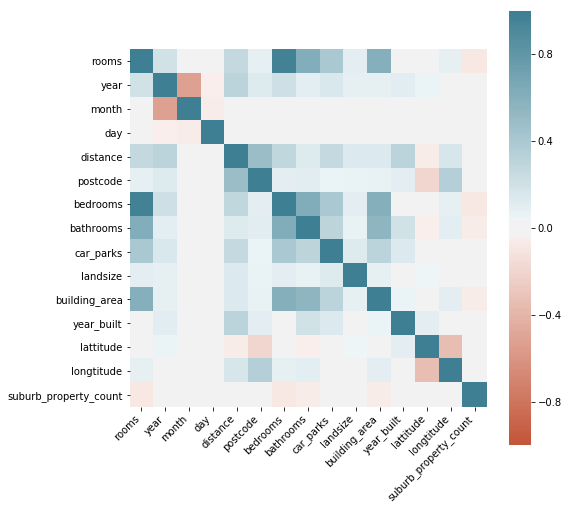

In [7]:
## correlation matrix
corr = data_copy.corr()
plt.figure(figsize = (8,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# data_copy.dtypes
# data_copy.head()
data_copy.corr()

In [8]:
data_copy = data_copy.drop(columns=['date'])
data_copy = data_copy.drop(columns=['max_bound_100K'])
data_copy = data_copy.drop(columns=['type', 'min_bound_100K',])

# data_copy = data_copy.drop(columns='bedrooms')
# data_copy = data_copy.drop(columns=['bathrooms'])

## remove the number before street name
for i, row in data_copy.iterrows():
    start = 0
    value = data_copy.at[i,'address']
    for index, c in enumerate(value):
        if(c.isalpha()):
            start = index
            break
    
    newVal = value[start:]
    data_copy.at[i,'address'] = newVal

In [9]:
data_copy.shape

(8887, 24)

In [10]:
## seperate target and attributes
X = data_copy.drop(columns='price_bands')
Y = data_copy['price_bands']

# le_suburb = preprocessing.LabelEncoder()
# suburb = data_copy['suburb']
# le_suburb.fit(suburb)
# suburb_converted = le_suburb.transform(suburb)

# data_copy['suburb'] = suburb_converted

## encode attributes
X_converted = pd.get_dummies(X)
# X_converted = preprocessing.normalize(X_converted)

print(X_converted.shape)
# X_converted.head()

(8887, 5430)


In [11]:
# svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# svd.fit(X_converted) 
# print(svd.explained_variance_ratio_)  
# principal_components = svd.fit_transform(X_converted)

In [12]:
## encode target
le = preprocessing.LabelEncoder()
le.fit(Y)

Y_converted = le.transform(Y)
max_value = max(Y_converted)
print(max_value)
class_labels = le.inverse_transform(np.arange(max_value + 1))

print(Y_converted)
print(class_labels)

59
[ 1  1  1  1 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23

In [13]:
## split train and test data
train_x, test_x, train_y, test_y = train_test_split(X_converted, Y_converted, test_size=0.2, random_state=42)

In [14]:
# pca = PCA(0.9)
# pca.fit(train_x)  
# print(pca.explained_variance_ratio_)  

# train_x = pca.transform(train_x)
# test_x = pca.transform(test_x)

# len(pca.explained_variance_)

In [15]:
# clf = tree.DecisionTreeClassifier(min_samples_split=12)
clf = RandomForestClassifier(n_estimators=30, min_samples_split=12, random_state=42)
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
print(metrics.accuracy_score(test_y, predictions))

0.23509561304836896


In [16]:
feature_imp = pd.Series(clf.feature_importances_, index=X_converted.columns).sort_values(ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(feature_imp)

building_area                                   3.667580e-02
lattitude                                       3.505487e-02
longtitude                                      3.060280e-02
year_built                                      2.763149e-02
distance                                        2.701678e-02
landsize                                        2.681592e-02
postcode                                        2.202504e-02
bedrooms                                        2.124014e-02
rooms                                           2.114185e-02
suburb_property_count                           2.114047e-02
day                                             1.907593e-02
month                                           1.666669e-02
car_parks                                       1.534898e-02
bathrooms                                       1.371725e-02
type_code_h                                     1.272172e-02
type_code_u                                     1.239733e-02
year                    

In [17]:
data.shape

(27244, 28)